# Assignment 2 - Weather

Create a plot of the temperature over time.

*by Eoghan Walsh*

## Import the modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

## Import the data

In [2]:
# Import the csv with pandas
weather = pd.read_csv("weatherreadings1.csv")

## First look at the data

In [3]:
# Let's take a look
weather.head(5)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [4]:
# Let's get some info on the columns.
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [5]:
# Let's convert the data type of the Date columns.
weather["reportStartDateTime"] = pd.to_datetime(weather["reportStartDateTime"])

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     datetime64[ns, UTC]
 2   reportEndDateTime               89 non-null     object             
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

## Plot temperature over time

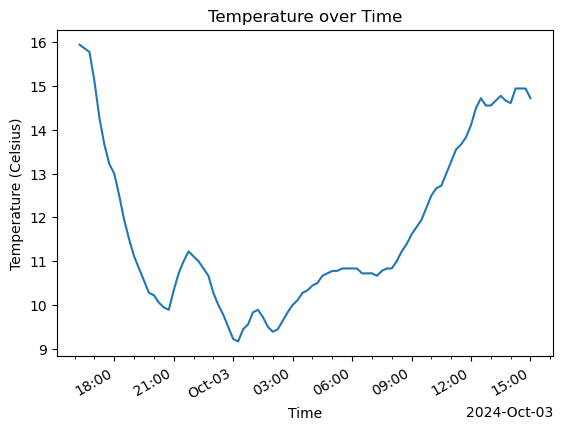

In [7]:
x = weather["reportStartDateTime"]
y = weather["dryBulbTemperature_Celsius"]


fig, ax = plt.subplots()

ax.plot(x, y)

ax.set_title("Temperature over Time")
ax.set_ylabel("Temperature (Celsius)")
ax.set_xlabel("Time")

locator = mdates.AutoDateLocator() # https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.ConciseDateFormatter
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_minor_locator(AutoMinorLocator(3)) # https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure

fig.autofmt_xdate() # https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html#matplotlib-figure-figure-autofmt-xdate

plt.show()